In [1]:
import torch 
import numpy as np 
import torch.nn as nn
from tqdm import tqdm  
import matplotlib.pyplot as plt 
import torch.nn.functional as F 

In [2]:
# data from torchvision

from torchvision import datasets, transforms

train = datasets.MNIST('data/', train = True,  download=False, transform = transforms.Compose([transforms.ToTensor()]))
test  = datasets.MNIST('data/', train = False, download=False, transform = transforms.Compose([transforms.ToTensor()]))

In [3]:
# batches of data

train_batches = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
test_batches  = torch.utils.data.DataLoader(test,  batch_size=32, shuffle=True)

type(train_batches)

torch.utils.data.dataloader.DataLoader

In [4]:
# data
for data in train_batches:
    x,y = data 
    print(x,y)
    break 

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [5]:
# visualize data 
x.shape 

torch.Size([32, 1, 28, 28])

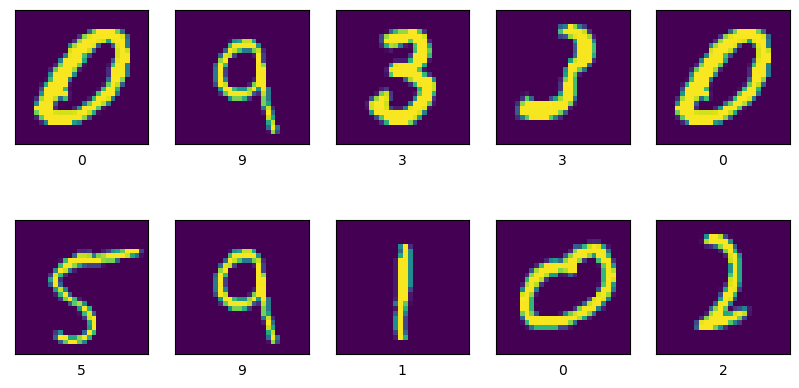

In [6]:
#Generate random image from first batch of images

plt.figure(figsize=(10,5))
j = 0
for i in range(10):
    j = j+1
    plt.subplot(2,5,j)
    random_number = torch.randint(1,32, (1,))
    plt.imshow(x[random_number.item()].view(28,28,1))
    plt.xlabel(y[random_number.item()].item())
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # calculate same padding:
        # (w - k + 2*p)/s + 1 = o
        # => p = (s(o-1) - w + k)/2
        
        # 28 * 28 *1  = 28 *28*8
        self.conv1 = nn.Conv2d(
                               in_channels= 1,
                               out_channels=8,  
                               kernel_size=(3,3), 
                               stride = (1,1), 
                               padding = 1)                  # p = (1(28-1) - 28 + 3) / 2 = 1
        
        # 28x28x8 => 14x14x8
        self.pool_1 = torch.nn.MaxPool2d(
                                         kernel_size=(2, 2),
                                         stride=(2, 2),
                                         padding=0)          # o = (28 - 2 + 0)/2 + 1 = 14
        # 14 * 14 *8  = 14 *14*16
        self.conv2 = nn.Conv2d(
                               in_channels= 8,
                               out_channels=16,  
                               kernel_size=(3,3), 
                               stride = (1,1), 
                               padding = 1)                   # p = (1(14-1) - 14 + 3) / 2 = 1
        
        # 14x14x16 => 7x7x16
        self.pool_2 = torch.nn.MaxPool2d(
                                         kernel_size=(2, 2),
                                         stride=(2, 2),
                                         padding=0)           # o = (14 - 2 + 0)/2 + 1 = 7
    
        self.flat = nn.Flatten()
      
        self.fc1 = nn.Linear(7*7*16, 128)
        self.fc2 = nn.Linear(128, 10)
        
        
        
    def forward(self, x):
            
        x = F.relu(self.conv1(x)) 
        x = self.pool_1(x)
            
        x = F.relu(self.conv2(x))
        x = self.pool_1(x)
            
        x = self.flat(x)
            
        x = F.relu(self.fc1(x))
        x = F.softmax(self.fc2(x), dim =1)
            
        return x 
         

In [8]:
# testing first batches of images

model_test = ConvNet()
print(model_test.parameters)

<bound method Module.parameters of ConvNet(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>


In [9]:
x.shape

torch.Size([32, 1, 28, 28])

In [10]:
model_test(x)

tensor([[0.1081, 0.1006, 0.0958, 0.1059, 0.1099, 0.0933, 0.0958, 0.0991, 0.0899,
         0.1016],
        [0.1081, 0.0973, 0.0990, 0.1062, 0.1066, 0.0956, 0.0982, 0.0996, 0.0876,
         0.1018],
        [0.1083, 0.1005, 0.0948, 0.1063, 0.1115, 0.0933, 0.0955, 0.0999, 0.0898,
         0.1002],
        [0.1067, 0.0983, 0.0975, 0.1057, 0.1069, 0.0952, 0.0974, 0.0998, 0.0885,
         0.1040],
        [0.1080, 0.1001, 0.0948, 0.1070, 0.1106, 0.0929, 0.0962, 0.0992, 0.0896,
         0.1015],
        [0.1090, 0.0980, 0.0976, 0.1062, 0.1070, 0.0939, 0.0971, 0.1004, 0.0905,
         0.1003],
        [0.1065, 0.0991, 0.0971, 0.1049, 0.1080, 0.0958, 0.0979, 0.1001, 0.0883,
         0.1024],
        [0.1073, 0.0991, 0.0953, 0.1061, 0.1103, 0.0929, 0.0980, 0.0995, 0.0914,
         0.1002],
        [0.1093, 0.0973, 0.0976, 0.1056, 0.1067, 0.0959, 0.0988, 0.0990, 0.0881,
         0.1018],
        [0.1083, 0.0973, 0.0975, 0.1055, 0.1079, 0.0950, 0.0977, 0.1002, 0.0888,
         0.1019],
        [0

In [11]:
# initilize model
model = ConvNet()

In [12]:
# Training loop

def train(train_loader, lr = 0.01, epochs = 5):
    
    # optimizer 
    optimizer = torch.optim.SGD(model.parameters(), lr = lr)
    
    for epoch in range(epochs):
        running_loss = 0 
        for data in tqdm(train_loader):
            x,y = data
            model.zero_grad()
            pred = model(x)
            loss = F.cross_entropy(pred, y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch: {epoch+1},| loss: {running_loss/len(train_loader)}')       

In [13]:
train(train_batches, lr = 0.1, epochs =5)

100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:15<00:00, 121.76it/s]


Epoch: 1,| loss: 1.8079773867289226


100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:15<00:00, 117.61it/s]


Epoch: 2,| loss: 1.5442791637420654


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:18<00:00, 99.56it/s]


Epoch: 3,| loss: 1.4973558395385742


100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:18<00:00, 101.68it/s]


Epoch: 4,| loss: 1.4894321338017782


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:19<00:00, 96.04it/s]

Epoch: 5,| loss: 1.4841627597173055


In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_batches:
        x,y = data 
        pred = model(x)
        for idx, data in enumerate(pred):
            if torch.argmax(data)==y[idx]:
                correct +=1
            total +=1
print(f'Accuracy : {correct/total:.3f}')   

Accuracy : 0.979
